<a href="https://colab.research.google.com/github/Blurr99/tensorflow_deepLearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


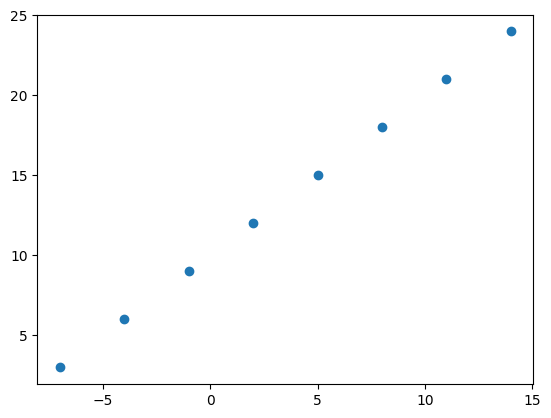

In [2]:
## Creating Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape,
output_shape = y.shape
input_shape, output_shape

(((8,),), (8,))

In [5]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

In [7]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model**- defining the input and output layers, as well as the hidden layersof a deep learing model.
2. **Compiling the model**- define the loss function and the optimizer and evaluating metrics.
3. **Fitting the model**- letting the model find patterns between x and y

In [8]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = 1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 457ms/step - loss: 12.8836 - mae: 12.8836
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 12.7511 - mae: 12.7511
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 12.6186 - mae: 12.6186
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 12.4861 - mae: 12.4861
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 12.3536 - mae: 12.3536


In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[6.0190325]], dtype=float32)

## Improving our model

The model can be improved by altering the steps taken to create the model:

1. **Creating a model**- Adding more layers, increase the number of hidden neurons, changing the activation function of each layer etc.

2. **Compiling a model**- Changing the optimization function, **learning rate** of the said function.

3. **Fitting a model**- Increasing the number of epochs or the data.

In [11]:
# Rebuilding the model

#1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 333ms/step - loss: 19.7897 - mae: 19.7897
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 19.5085 - mae: 19.5085
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 19.2272 - mae: 19.2272
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 18.9460 - mae: 18.9460
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 18.6647 - mae: 18.6647
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 18.3835 - mae: 18.3835
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 18.1022 - mae: 18.1022
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 17.8210 - mae: 17.8210
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 17.5397 - mae: 17.5397
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 17.2585 - mae: 17.2585
Epoch 11/100
1/1 [==============================] - 0

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Checking the model's prediction
model.predict([17.])

1/1 [==============================] - 0s 60ms/step


array([[29.272121]], dtype=float32)

In [14]:
#1. Creating the model (with another hidden layer and a 100 neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 90)

Epoch 1/90
1/1 [==============================] - 1s 598ms/step - loss: 12.7731 - mae: 12.7731
Epoch 2/90
1/1 [==============================] - 0s 11ms/step - loss: 12.7035 - mae: 12.7035
Epoch 3/90
1/1 [==============================] - 0s 11ms/step - loss: 12.6340 - mae: 12.6340
Epoch 4/90
1/1 [==============================] - 0s 10ms/step - loss: 12.5644 - mae: 12.5644
Epoch 5/90
1/1 [==============================] - 0s 12ms/step - loss: 12.4947 - mae: 12.4947
Epoch 6/90
1/1 [==============================] - 0s 12ms/step - loss: 12.4251 - mae: 12.4251
Epoch 7/90
1/1 [==============================] - 0s 11ms/step - loss: 12.3554 - mae: 12.3554
Epoch 8/90
1/1 [==============================] - 0s 16ms/step - loss: 12.2858 - mae: 12.2858
Epoch 9/90
1/1 [==============================] - 0s 16ms/step - loss: 12.2160 - mae: 12.2160
Epoch 10/90
1/1 [==============================] - 0s 11ms/step - loss: 12.1463 - mae: 12.1463
Epoch 11/90
1/1 [==============================] - 0s 11ms

In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Trying to make a prediction again
model.predict([17.])

1/1 [==============================] - 0s 71ms/step


array([[31.59443]], dtype=float32)

## Evaluating the model

To evaluate a model, its a good idea to visualize:
* The data - What does the data look like?
* The model - What does the model look like?
* The training of the model - How does the model perform while it learns
* The predictions of the model - How do the predictions of a model line up against the ground truth?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

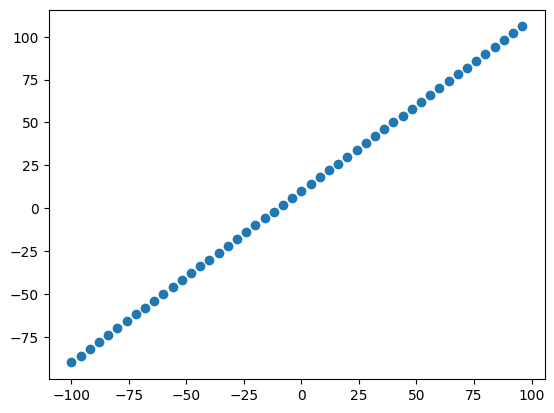

In [19]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [20]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

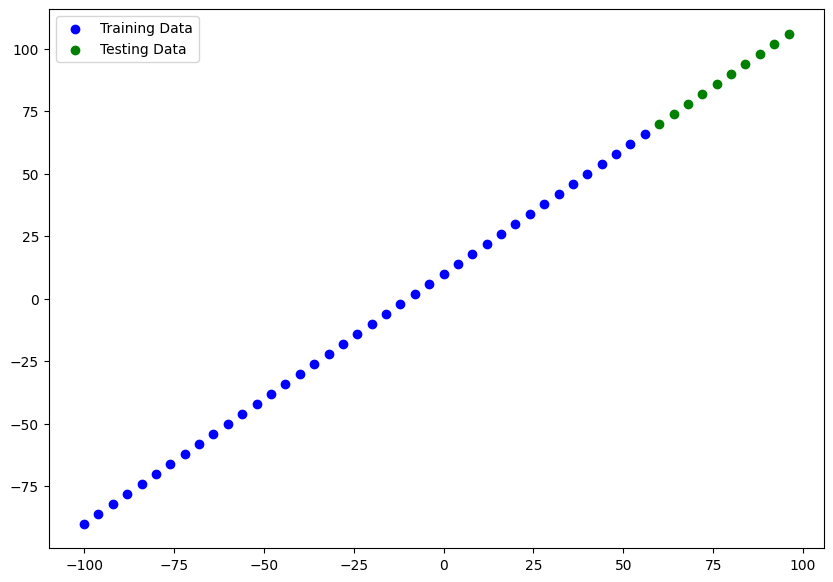

In [21]:
plt.figure(figsize = (10, 7))
# Plotting the training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data")

# Plotting the testing data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing Data")

# Show a legend
plt.legend();

In [22]:
# Building a neural network for the new data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting the model
#model.fit(X_train, y_train, epochs = 100)

In [23]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [24]:
# Creating a model that builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Creating a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "a_model")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [25]:
model.summary()

Model: "a_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters
* Trainable params - the parameters the model can update as it trains
* Non-trainable params - parameters that arent updated when training. Typical when bringing in already learnt patterns or parameters from other models during transfer learning

In [26]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [27]:
model.summary()

Model: "a_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


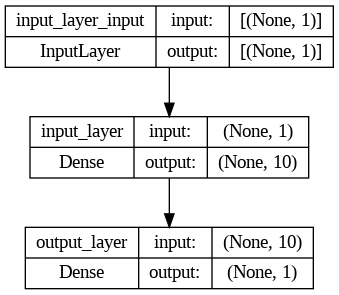

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

### Visualizing the model's predictions

To visualize predictions, its a good idea to plot them against the ground truth labels.

In [29]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[ 90.99371 ],
       [ 96.936104],
       [102.87851 ],
       [108.82091 ],
       [114.7633  ],
       [120.705696],
       [126.648094],
       [132.5905  ],
       [138.5329  ],
       [144.4753  ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [31]:
# Creating a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
    Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize = (10,7))
  # Plot the training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot the testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  # Show the legend
  plt.legend();

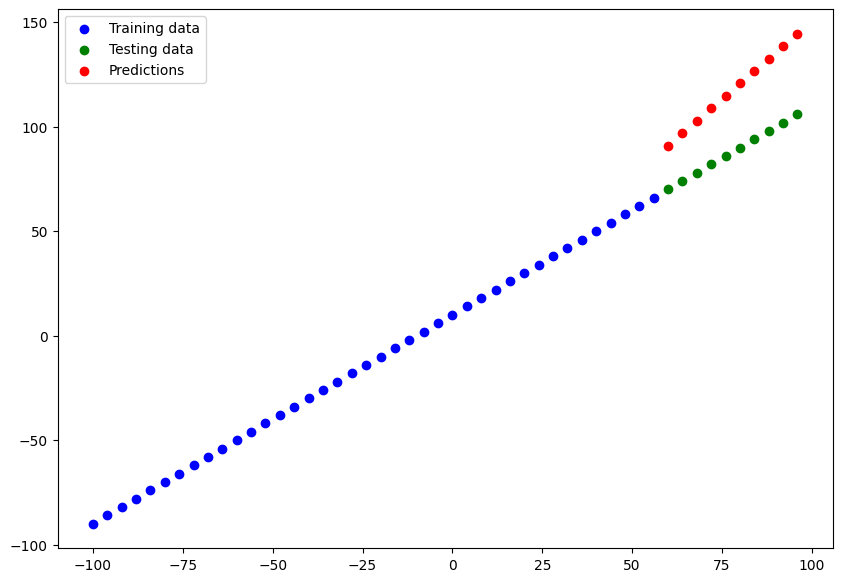

In [32]:
plot_predictions()

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance.

For a regression problem, Two of the main metrices are:
* MAE - Mean Absolute Error, how wrong is each of the model's prediction (Great Starter metric)
* MSE - Mean Square Error (When larger errors are more significant than smaller errors)
* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE

In [33]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 330ms/step - loss: 29.7345 - mae: 29.7345


[29.734500885009766, 29.734500885009766]

In [34]:
# Calculate the Mean Absolute Error
tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.198743, 11.974442, 15.502808, 20.820908, 26.7633  , 32.705696,
       38.648094, 44.5905  , 50.532898, 56.475292], dtype=float32)>

In [35]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 90.99371 ],
       [ 96.936104],
       [102.87851 ],
       [108.82091 ],
       [114.7633  ],
       [120.705696],
       [126.648094],
       [132.5905  ],
       [138.5329  ],
       [144.4753  ]], dtype=float32)>

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.99371 ,  96.936104, 102.87851 , 108.82091 , 114.7633  ,
       120.705696, 126.648094, 132.5905  , 138.5329  , 144.4753  ],
      dtype=float32)>

In [38]:
# Calculate the Mean Absolute Error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=29.734503>

In [39]:
# Calculate the Mean Absolute Error by expanding the test vector (doesnt work as intended)
tf.metrics.mean_absolute_error(tf.expand_dims(y_test, axis = -1), y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.993713, 22.936104, 24.87851 , 26.820908, 28.763298, 30.705696,
       32.648094, 34.5905  , 36.532898, 38.475296], dtype=float32)>

In [40]:
tf.expand_dims(y_test, axis = -1)

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [41]:
# Calculate the Mean Squared Error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=915.2672>

In [42]:
# Making functions to resuse MSE and MAE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

### Running experiments to improve the model

1. Get more data- get more examples for the model to train on.
2. Make the model larger- this might come in the form of more layers or more hidden units in each layer.
3. Train for longer- give the model more of a chance to find patterns in the data

In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Trying 3 modelling experiments:
  1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
  2. `model_2` - 2 layers, trained for a 100 epochs.
  3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [44]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 36ms/step - loss: 99.2737 - mae: 99.2737
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 63.8182 - mae: 63.8182
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 26.6584 - mae: 26.6584
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 11.2425 - mae: 11.2425
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4627 - mae: 12.4627
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.6459 - mae: 9.6459
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7546 - mae: 8.7546
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0873 - mae: 9.0873
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.1588 - mae: 19.1588
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 10.3613 - mae: 10.3613
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 110ms/step


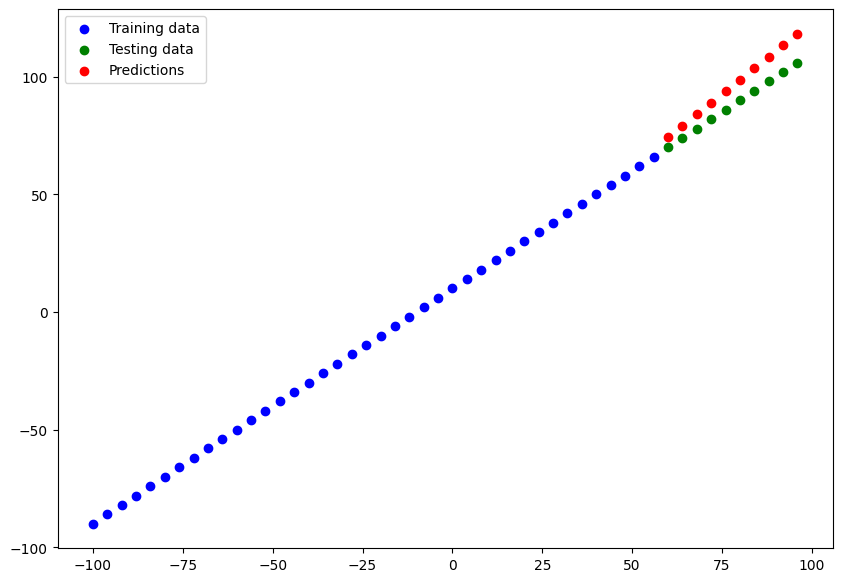

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [46]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(8.325836, 75.62362)


** Build `model_2`**

* 2 layers, trained for 100 epochs

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["mse"])

# 3. Fitting the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 79.1612 - mse: 8671.9814
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 78.6204 - mse: 8553.6514
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 78.1007 - mse: 8439.3281
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 77.5751 - mse: 8324.7012
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 77.0614 - mse: 8215.3408
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 76.5454 - mse: 8103.6807
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 76.0274 - mse: 7991.7939
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 75.4923 - mse: 7874.1616
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 74.9976 - mse: 7773.8408
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 74.4995 - mse: 7669.8594
Epoch 11/100
2/2 [==============

In [48]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 110ms/step


array([[30.1747  ],
       [32.228794],
       [34.282887],
       [36.336975],
       [38.391068],
       [40.44516 ],
       [42.49925 ],
       [44.553337],
       [46.60743 ],
       [48.661514]], dtype=float32)

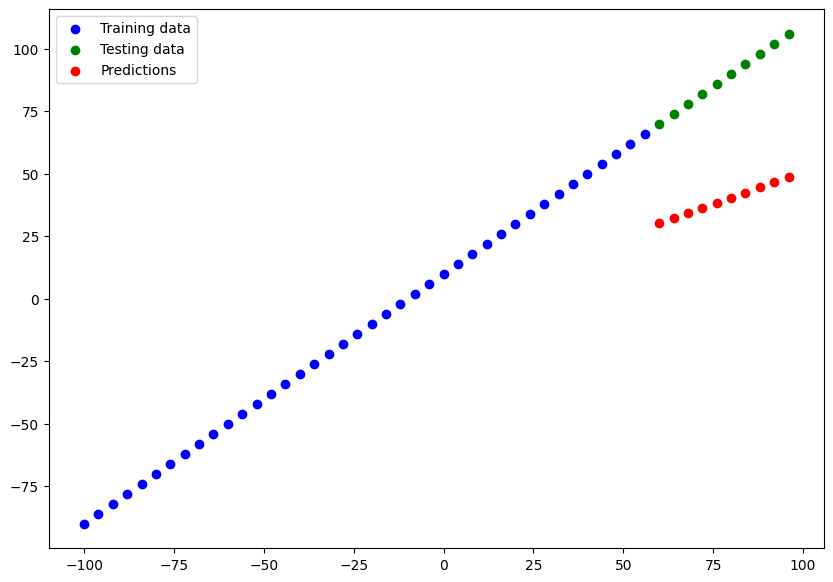

In [49]:
plot_predictions(predictions=y_preds_2)

In [50]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(48.581886, 2391.439)

**Build `model_3`**

2 layers, trained for 500 epochs.

In [51]:
# Set the random seed
tf.random.set_seed(42)

# 1. Building the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["mse"])

# 3. Fitting the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 51.5548 - mse: 3644.9683
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 51.0028 - mse: 3566.8618
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 50.4726 - mse: 3490.9634
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 49.9282 - mse: 3414.8882
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 49.3958 - mse: 3342.2910
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 48.8574 - mse: 3268.2446
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 48.3130 - mse: 3193.6033
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 47.7493 - mse: 3115.0938
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 47.2205 - mse: 3047.7415
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 46.6904 - mse: 2978.1997
Epoch 11/500
2/2 [===========

1/1 [==============================] - 0s 164ms/step


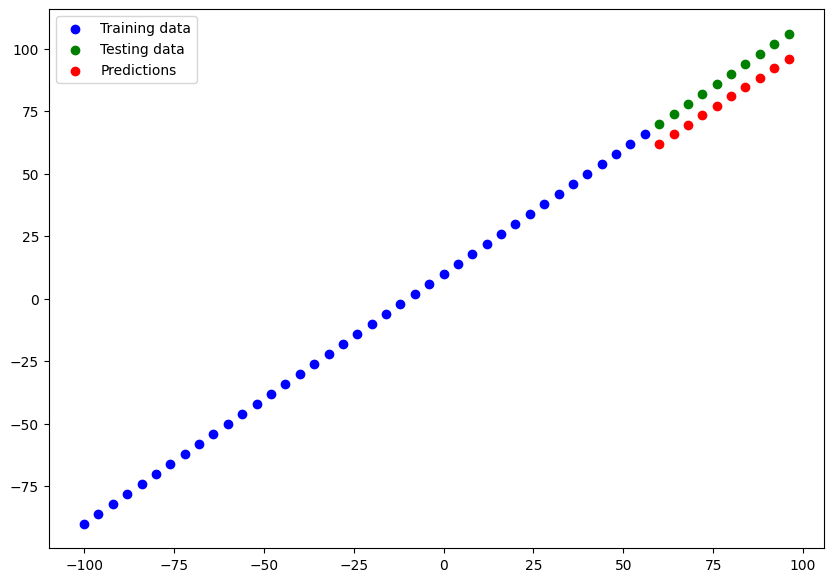

In [52]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [53]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(8.968459, 80.890205)

## Comparing the results of our experiments


In [54]:
# Comparing our model's results using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns = ["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,8.325836,75.623619
1,model_2,48.581886,2391.438965
2,model_3,8.968459,80.890205


### Model 3 performed the best

In [55]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking Experiments

* Tensorboard - a component of the TensorFLow lib to help track modelling experiments.
* Weights & biases - a tool for tracking all kinds of machine learning experiments (plus straight into TensorBoard)

## Saving a model

In [56]:
model_3.save('best_one_SavedModel_format')

In [57]:
# Save the model using the HDF5 format
model_3.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [58]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_one_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
#Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
mae(y_test, model_3_preds) == mae(y_test, loaded_SavedModel_format_preds)

True

In [62]:
# Load in a model using the h5 format
loaded_h5_model = tf.keras.models.load_model('/content/my_model.h5')
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Check to see if loaded .h5 model predictions match model_3 preds
model_3_preds = model_3.predict(X_test)
loaded_h5_preds = loaded_h5_model.predict(X_test)

model_3_preds == loaded_h5_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
mae(y_test, model_3_preds) == mae(y_test, loaded_h5_preds)

True

## Download a model(or any other file) from Google Colab

In [65]:
# Download a file from Google Colab
from google.colab import files
files.download('/content/my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A Larger Example

In [66]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
# One hot encoding the DataFrame so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [71]:
# Create X and y values
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [73]:
# View X and y
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [74]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [76]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [78]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 8585.5898 - mae: 8585.5898
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7878.2329 - mae: 7878.2329
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7592.4971 - mae: 7592.4971
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7555.9609 - mae: 7555.9609
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7611.7544 - mae: 7611.7544
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.0479 - mae: 7578.0479
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7513.8677 - mae: 7513.8677
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7799.4614 - mae: 7799.4614
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7605.6621 - mae: 7605.6621
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7656.4541 - mae: 7656.4541

In [79]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 7658.2559 - mae: 7658.2559


[7658.255859375, 7658.255859375]

In [81]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

To try to improve the model, trying 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [87]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13294.8867 - mae: 13294.8867
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13139.0010 - mae: 13139.0010
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12810.6377 - mae: 12810.6377
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12157.4717 - mae: 12157.4717
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11043.8057 - mae: 11043.8057
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9593.1260 - mae: 9593.1260
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 8243.6221 - mae: 8243.6221
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7562.6841 - mae: 7562.6841
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7444.1284 - mae: 7444.1284
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 7422.3887 - mae:

In [88]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4811.7437 - mae: 4811.7437


[4811.74365234375, 4811.74365234375]

In [91]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 3s 7ms/step - loss: 13290.8232 - mae: 13290.8232
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13126.5840 - mae: 13126.5840
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12783.4004 - mae: 12783.4004
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12115.6953 - mae: 12115.6953
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11004.9902 - mae: 11004.9902
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9584.8896 - mae: 9584.8896
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8260.5645 - mae: 8260.5645
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7577.1494 - mae: 7577.1494
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7452.0596 - mae: 7452.0596
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7431.1006 - mae:

In [92]:
# Evaluating the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3503.1758 - mae: 3503.1758


[3503.17578125, 3503.17578125]

Text(0.5, 0, 'epochs')

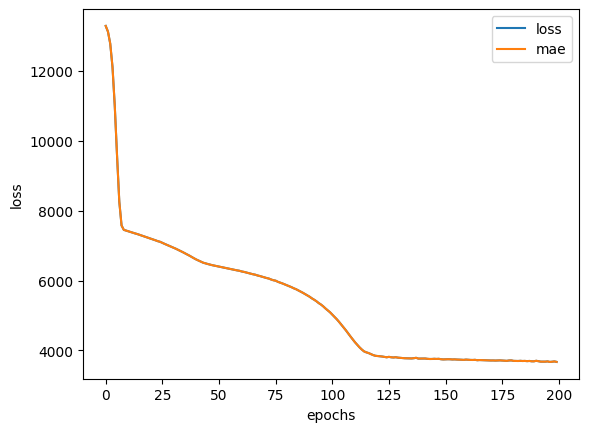

In [94]:
# Plot history (also known as the loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data (normalization and standardization)

In terms of scaling values, neural networks tends to prefer normalization.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [106]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct =  make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turning all values in these columns between 0-1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Building train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and testing data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [108]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [110]:
X_train.shape ,X_train_normal.shape

((1070, 6), (1070, 11))

In [111]:
# Build a neural network model to fit on the normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 3s 6ms/step - loss: 13344.7559 - mae: 13344.7559
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13339.0391 - mae: 13339.0391
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13323.3330 - mae: 13323.3330
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13288.0869 - mae: 13288.0869
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 13222.6230 - mae: 13222.6230
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13115.5586 - mae: 13115.5586
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12956.0010 - mae: 12956.0010
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12733.4814 - mae: 12733.4814
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12437.5254 - mae: 12437.5254
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 12059.81

In [112]:
# Evaluate the insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3442.8350 - mae: 3442.8350


[3442.8349609375, 3442.8349609375]